In [1]:
# import all libraries here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import joblib

In [2]:
# loading the complete and abridged dataframes

df = joblib.load('../data/jlib_files/dataframes/modelling_df_1_cleaning.jlib')
df_vis = joblib.load('../data/jlib_files/dataframes/complete_df_1_cleaning.jlib')

In [3]:
# creating a new TFL Zone column with object data types for visualisations

df_vis['tfl_zone_object'] = df_vis.tfl_zone.apply(lambda x: 'Zone ' + str(x))

To-Do List

EDA:

- EDA for NLP

Pre-processing:

- lowercase the text
- potentially look in to lemmatization (normalization)
- clean noise from the data
- remove stopwords

Modelling:

- review the use of NLP - could we instead look at key words within the variables? This might be a better option for the title variable
- can we use neural networks?

- geographical map showing where the model has worked well

After completion of project:

EDA:

- try to visualise how much information we could potentially be losing out on by not using review data
- timeseries visualisations - off-topic but could be interesting as a result of Covid impact on 2020

Variable Transformation:

- look at distributions of continuous/discrete variables - do they need transforming?
- look in to log transforming the continuous variables (naive-Bayes lessons)

good visualisations: https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-2-how-to-improve-your-nightly-price-50ea8bc2bd29

# Exploratory Data Analysis

### Price

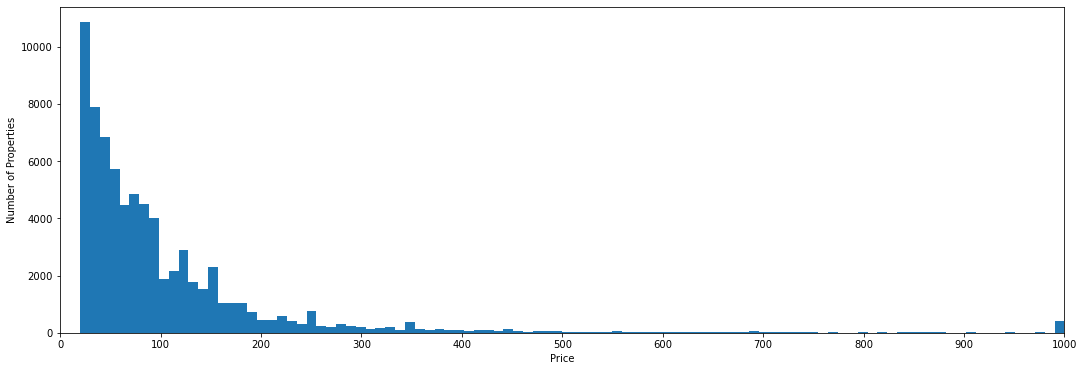

In [4]:
fig,ax = plt.subplots(figsize=(18,6))

ax.hist(df.price, bins=100)
ax.margins(x=0)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_xticks(range(0,1001, 100))

plt.show()

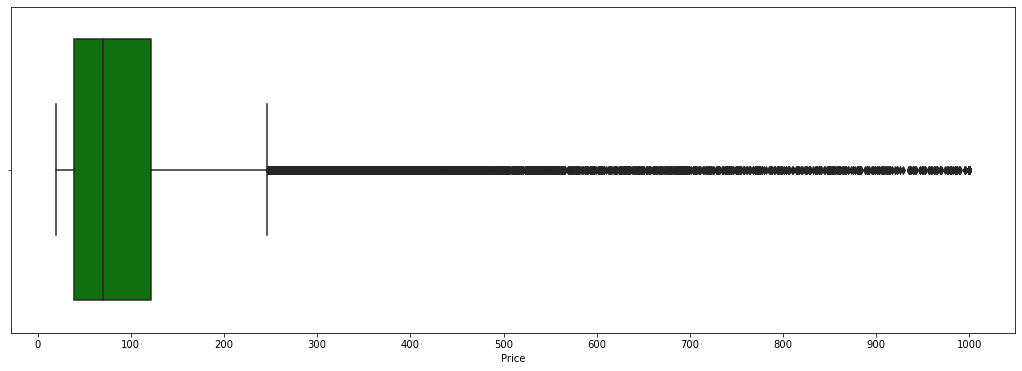

In [5]:
fig,ax = plt.subplots(figsize=(18,6))

sns.boxplot(x=df.price, color='g')

ax.set_xlabel('Price')
ax.set_xticks(range(0,1001, 100))

plt.show()

### Histogram distributions of quantitative variables 

In [6]:
describe_variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count',
                     'distance_from_center', 'station_distance', 'mean_monthly_rent', 'name_length',
                     'description_length', 'neighborhood_overview_length', 'host_about_length']

df[describe_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,73364.0,3.002522,1.916181,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,73364.0,1.251506,0.572731,0.500000,1.000000,1.000000,1.000000,17.000000
bedrooms,73364.0,1.465937,0.858498,1.000000,1.000000,1.000000,2.000000,22.000000
beds,73364.0,1.712093,1.228469,1.000000,1.000000,1.000000,2.000000,38.000000
price,73364.0,105.941143,126.989944,20.000000,39.000000,70.000000,122.000000,1000.000000
calculated_host_listings_count,73364.0,28.106128,111.625202,1.000000,1.000000,1.000000,4.000000,861.000000
distance_from_center,73364.0,7.241909,4.493219,0.017436,4.148304,6.086199,9.455120,29.311408
station_distance,73364.0,0.725411,0.919740,0.001587,0.290835,0.470464,0.768426,11.349528
mean_monthly_rent,73364.0,1471.515909,311.658425,859.000000,1282.000000,1461.000000,1633.000000,2611.000000
name_length,73364.0,6.466073,2.029768,0.000000,5.000000,7.000000,8.000000,45.000000


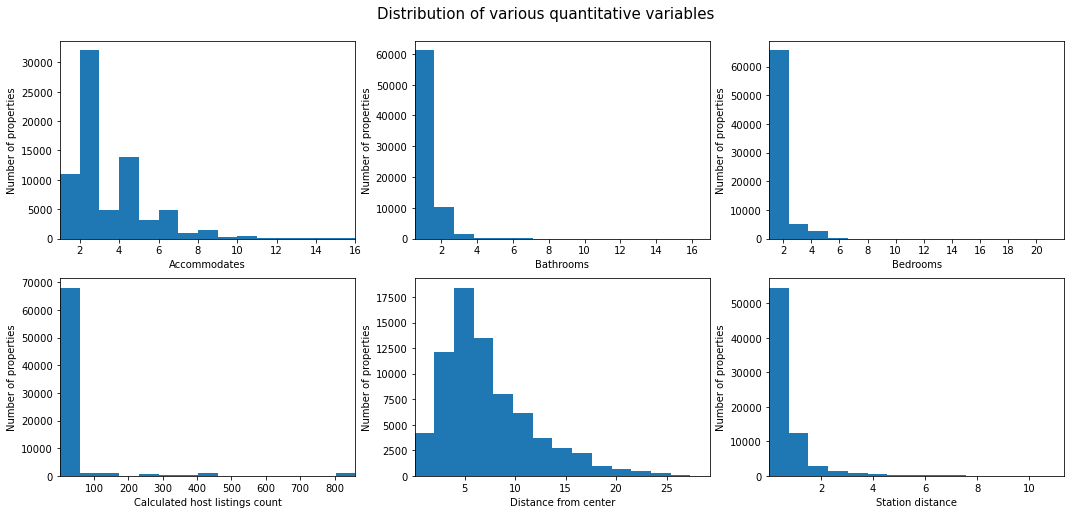

In [7]:
quantitative_variables = ['accommodates', 'bathrooms', 'bedrooms', 'calculated_host_listings_count',
                         'distance_from_center', 'station_distance']

fig,ax = plt.subplots(2, 3, figsize=(18,8))

counter = 0

for r in range(2):
    for c in range(3):
        
        column = quantitative_variables[counter]
        title = column.replace('_',' ').capitalize()
        
        ax[r,c].hist(df[column], bins=15)
        
        ax[r,c].set_xlabel(title)
        ax[r,c].set_ylabel('Number of properties')
        ax[r,c].margins(x=0)
        
        counter += 1
        
ax[0,2].set_xticks(range(2,21,2))         

plt.suptitle('Distribution of various quantitative variables', y=0.94, size=15)
plt.show()

- horizontal histograms showing difference in price between room types and property types

additions - colour the bars differently to differentiate

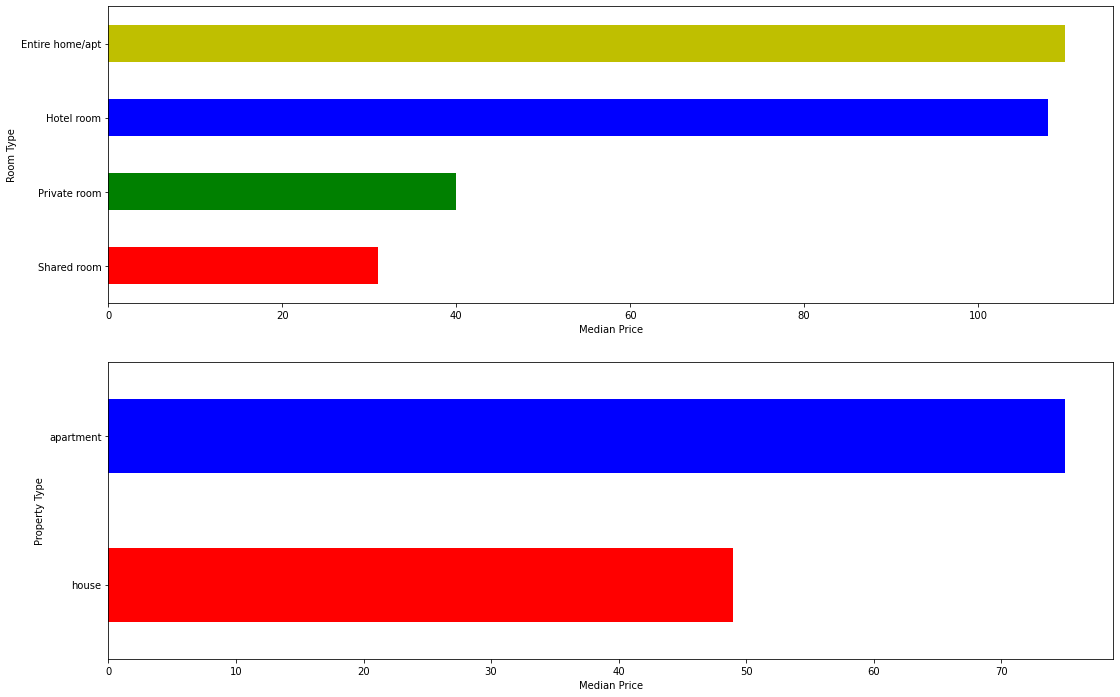

In [8]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').median()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').median()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Median Price')
ax[1].set_xlabel('Median Price')

plt.show()

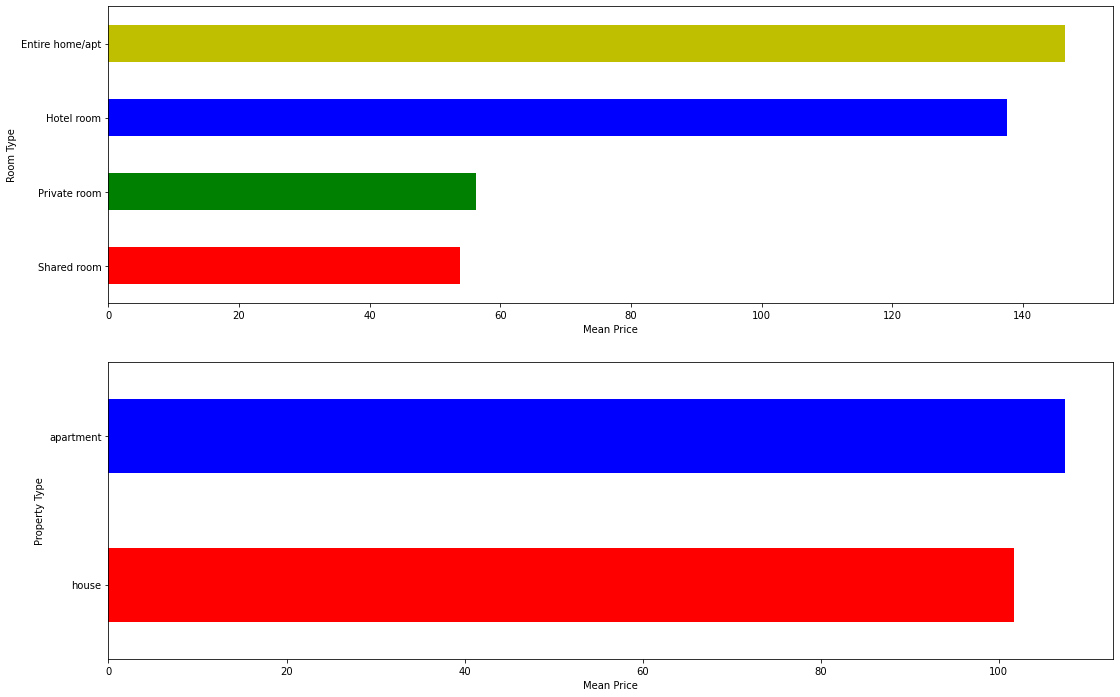

In [9]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').mean()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').mean()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Mean Price')
ax[1].set_xlabel('Mean Price')

plt.show()

In [10]:
neighbourhood_top_10 = df_vis.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10).index
neighbourhood_bottom_10 = df_vis.groupby('neighbourhood')['price'].median().sort_values(ascending=False).tail(10).index

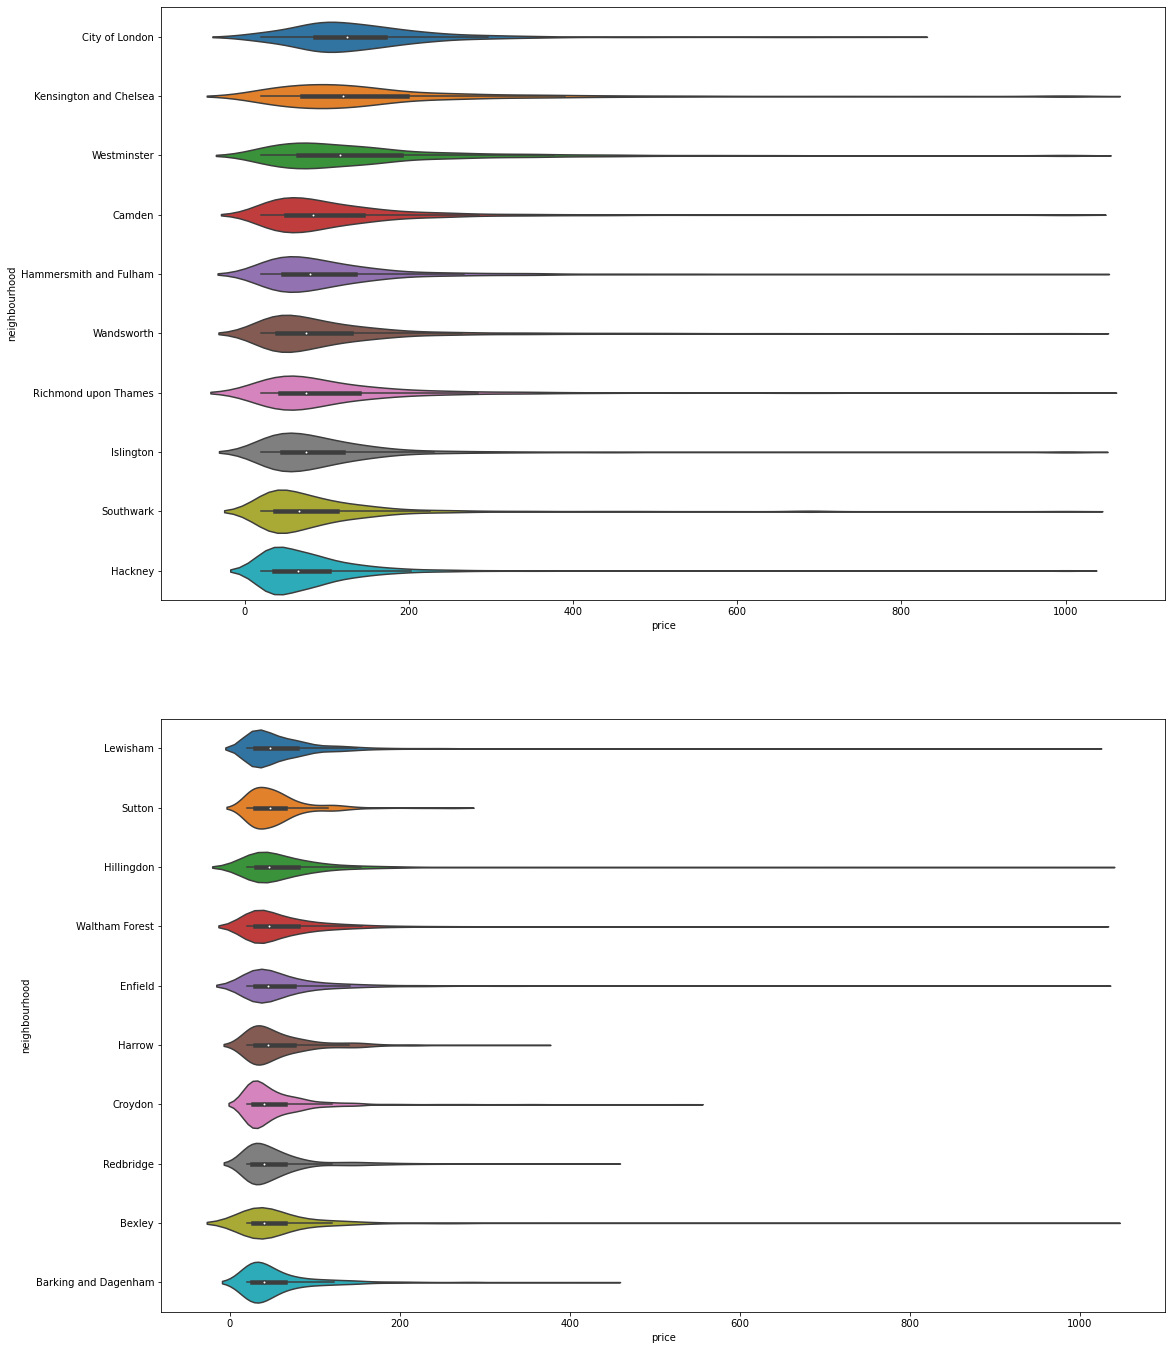

In [11]:
fig,ax = plt.subplots(2,1,figsize=(18,24))

sns.violinplot(x='price',y='neighbourhood',data=df_vis[df_vis.neighbourhood.isin(neighbourhood_top_10)],
               order=neighbourhood_top_10, ax=ax[0])

sns.violinplot(x='price',y='neighbourhood',data=df_vis[df_vis.neighbourhood.isin(neighbourhood_bottom_10)],
               order=neighbourhood_bottom_10, ax=ax[1])

plt.show()

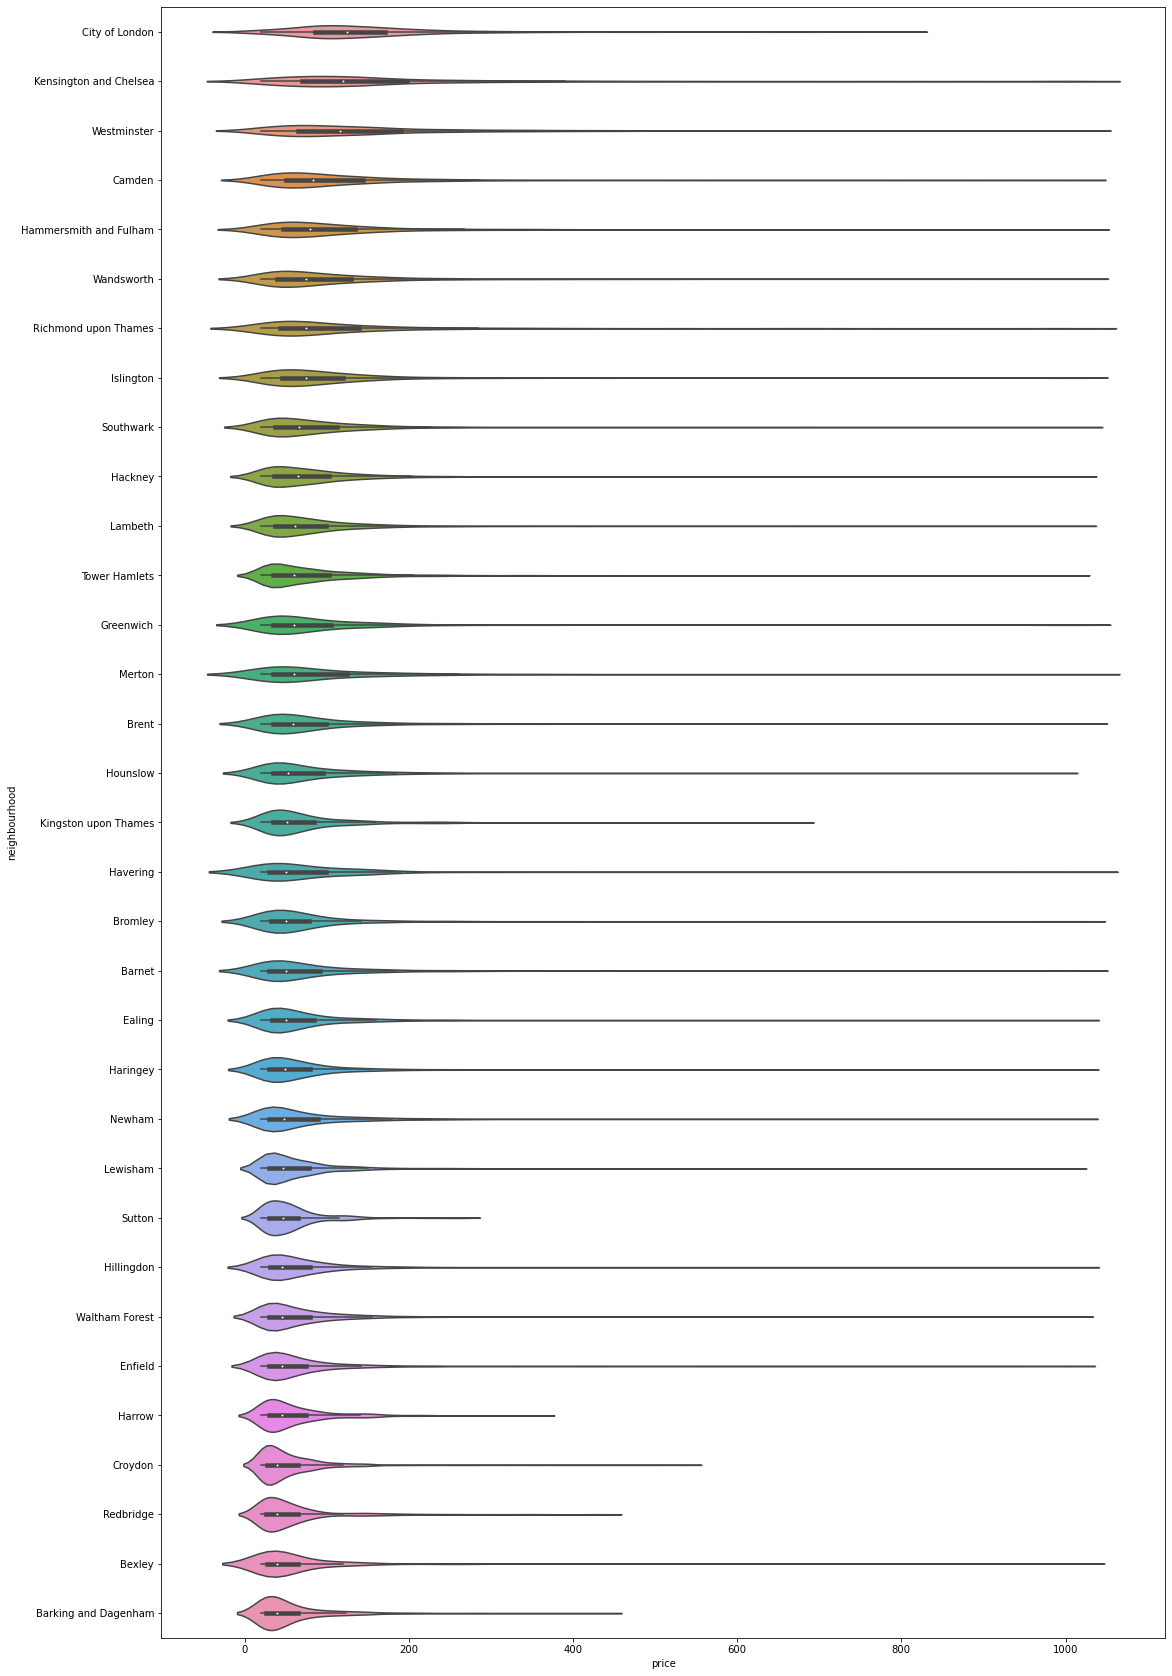

In [12]:
fig,ax = plt.subplots(figsize=(18,30))

neighbourhood_order = df_vis.groupby('neighbourhood').median()['price'].sort_values(ascending=False).index

sns.violinplot(x=df_vis.price,y=df_vis.neighbourhood,order = neighbourhood_order, ax=ax)

plt.show()

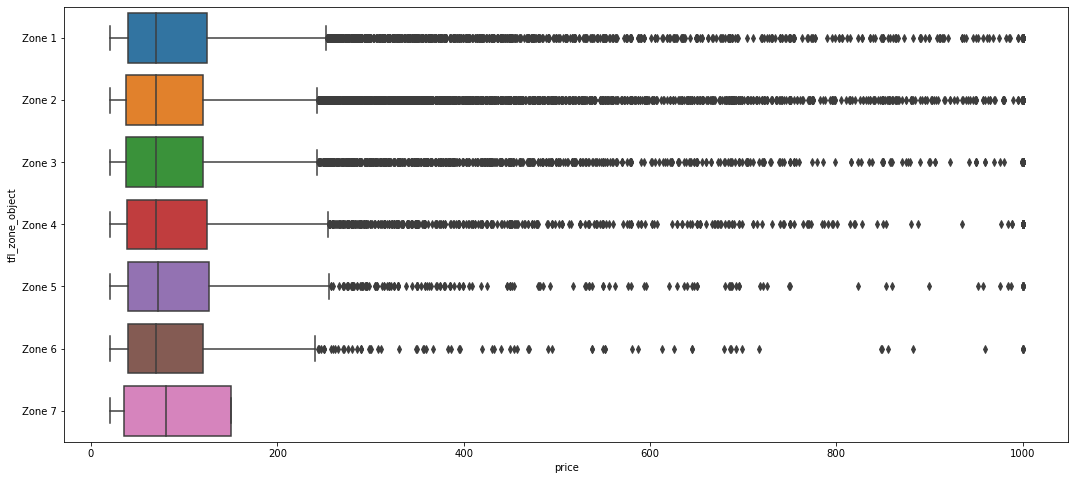

In [13]:
fig,ax = plt.subplots(figsize=(18,8))

tfl_order = sorted(df_vis.tfl_zone_object.unique())

sns.boxplot(x='price', y='tfl_zone_object', data=df_vis, order=tfl_order)

plt.show()

## GeoPandas

In [14]:
map_df_vis = gpd.read_file('../data/neighbourhoods.geojson')
map_df_vis.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [15]:
# Dropping the empty column
map_df_vis.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df_vis = pd.DataFrame(df_vis.groupby('neighbourhood').size())
neighbourhood_df_vis.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df_vis['median_price'] = df_vis.groupby('neighbourhood').price.median().values

# Joining the dataframes
neighbourhood_map_df_vis = map_df_vis.set_index('neighbourhood').join(neighbourhood_df_vis)

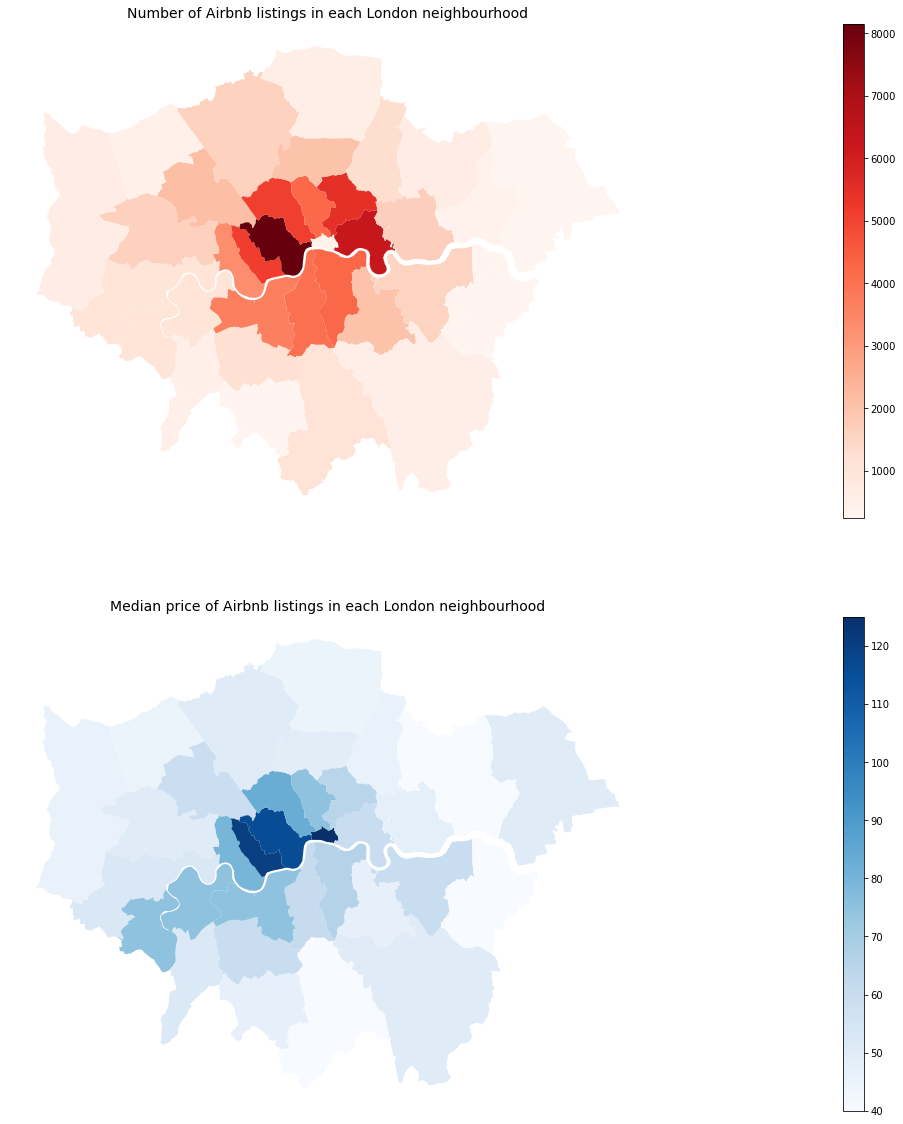

In [16]:
# Plotting the number of listings in each borough
fig, ax = plt.subplots(2,1, figsize=(20, 20))

divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='number_of_listings', cmap='Reds', ax=ax[0], legend=True, cax=cax0)
ax[0].axis('off')
ax[0].set_title('Number of Airbnb listings in each London neighbourhood', fontsize=14)

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='median_price', cmap='Blues', ax=ax[1], legend=True, cax=cax1)
ax[1].axis('off')
ax[1].set_title('Median price of Airbnb listings in each London neighbourhood', fontsize=14)

plt.show()

In [17]:
neighbourhood_df_vis['house_ratio'] = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

In [18]:
house_ratio = df_vis.groupby('neighbourhood')['property_type_basic'].value_counts(normalize='all').unstack()['house']

In [19]:
neighbourhood_map_df_vis = neighbourhood_map_df_vis.join(house_ratio, how='left')

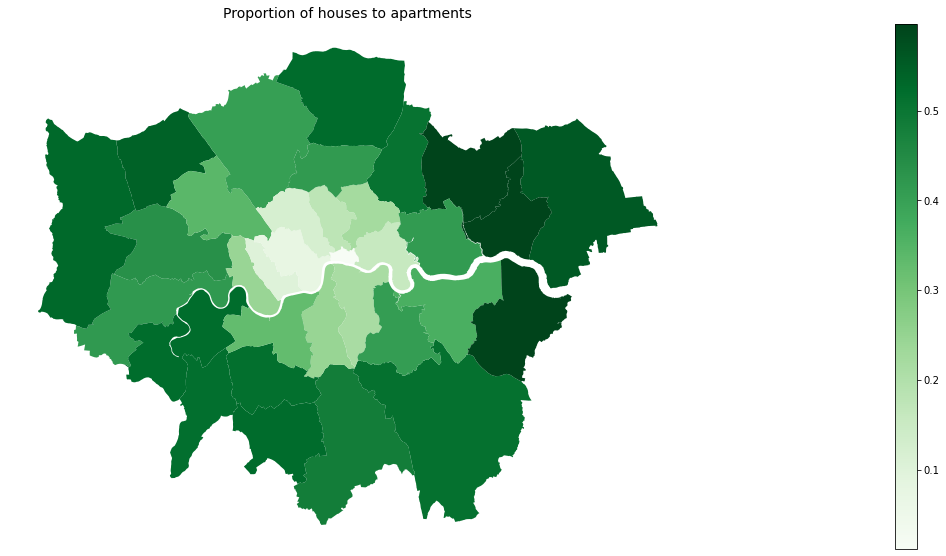

In [20]:
fig,ax = plt.subplots(figsize=(20,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0)

neighbourhood_map_df_vis.plot(column='house', cmap='Greens', ax=ax, legend=True, cax=cax)
ax.axis('off')
ax.set_title('Proportion of houses to apartments', fontsize=14)

plt.show()

credit for the code above to https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

Median Price Comparision for binary variables

In [21]:
amenities_variables = ['air_conditioning', 'bbq', 'baby_facilities', 'balcony_or_patio',
                       'bath', 'bed_linen', 'cable_tv', 'child_friendly', 'coffee_maker',
                       'cooking_facilities', 'dishwasher', 'garden', 
                       'has_workspace', 'host_greets_you', 'long_term_stays', 'luggage_dropoff',
                       'lock_on_bedroom_door', 'luxury_facilities', 'private_entrance',
                       'toiletries', 'tumble_dryer', 'tv']

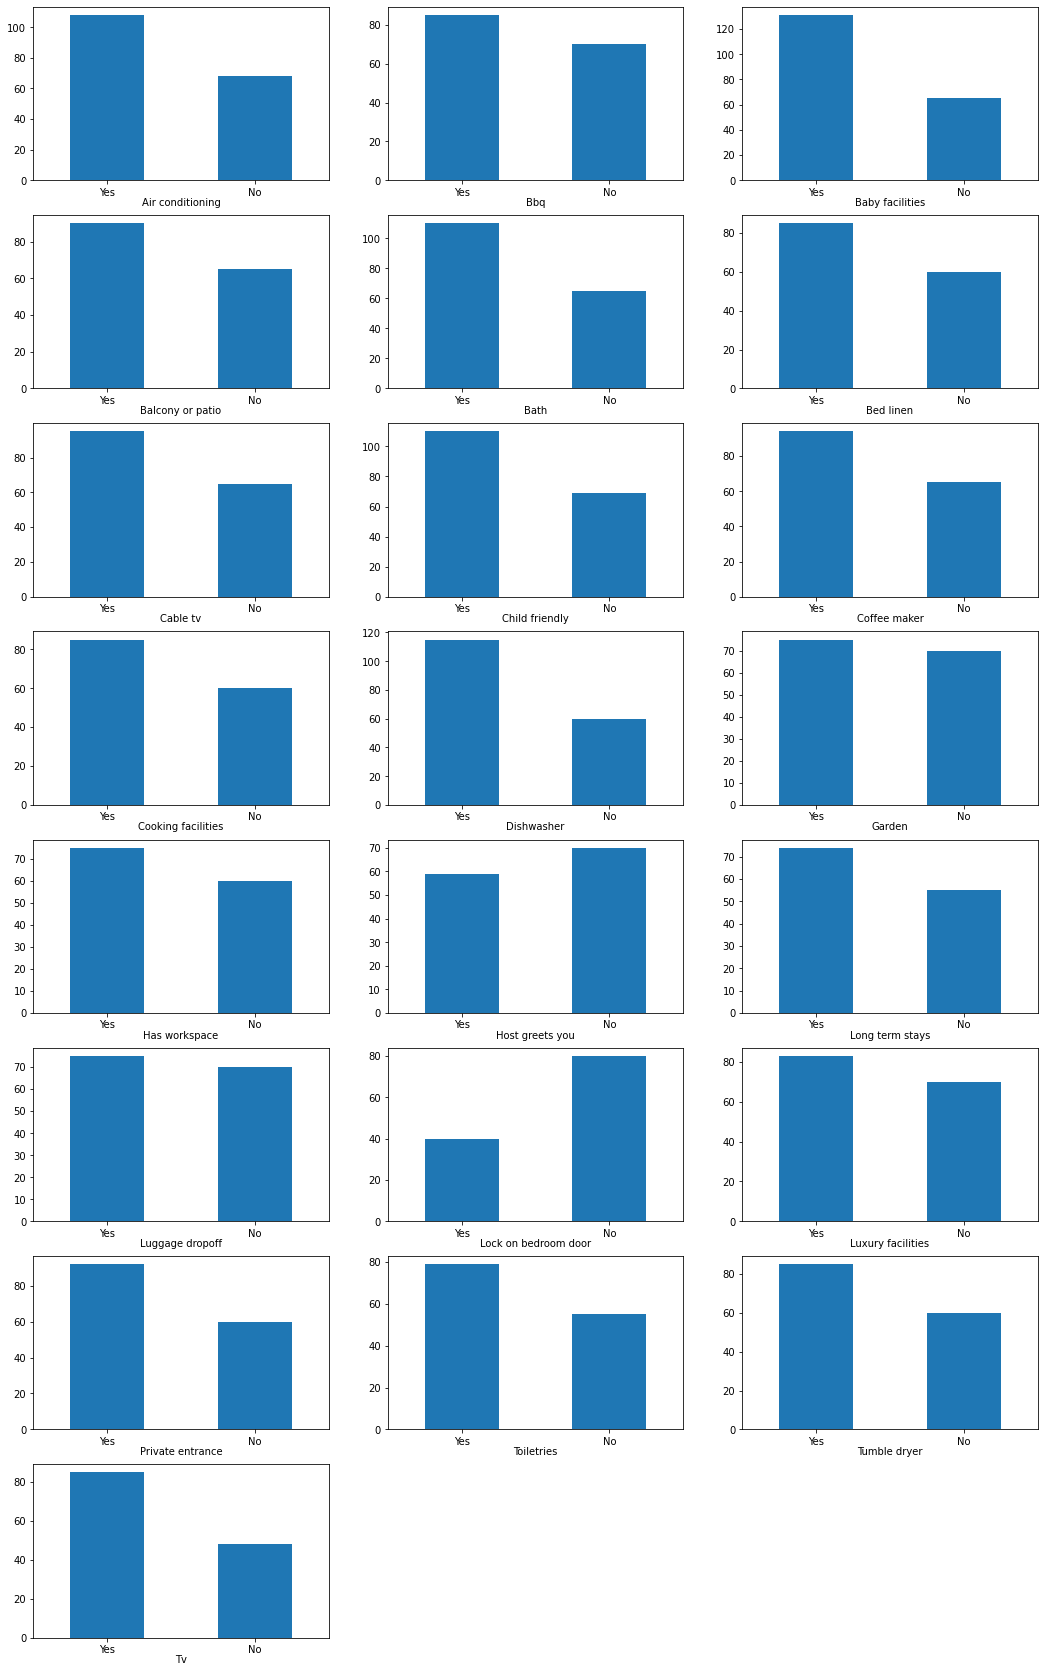

In [22]:
fig,ax = plt.subplots(8, 3, figsize=(18,30))

for ax_, amenity in zip(ax.flatten(), amenities_variables):
    
    x_label = amenity.replace('_', ' ').capitalize()
    
    df_vis.groupby(amenity).median()['price'].sort_index(ascending=False).plot.bar(ax=ax_)
    ax_.set_xticklabels(labels=['Yes', 'No'], rotation=0)
    ax_.set_xlabel(x_label, labelpad=0.2)

fig.delaxes(ax[7,1])
fig.delaxes(ax[7,2])
plt.show()

Median price comparison for other categorical variables

In [125]:
other_categorical_binary = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                           'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
                           'serviced_property', 'description_provided',
                           'neighborhood_overview_provided', 'host_about_provided']
other_categorical_non_binary = ['host_response_time', 'rail_network']

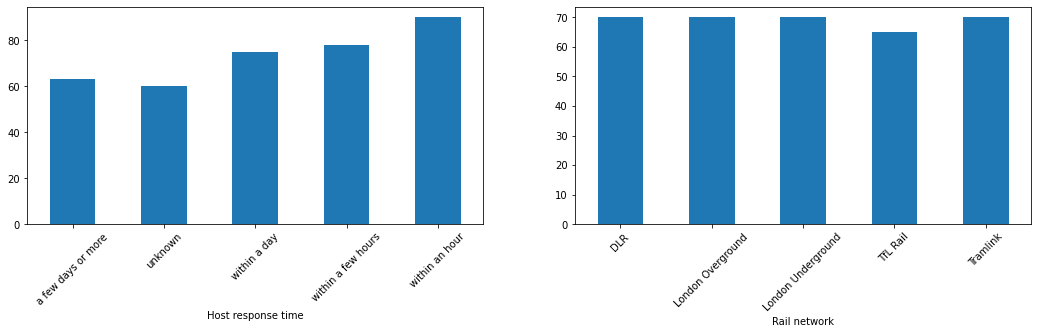

In [126]:
fig,ax = plt.subplots(1,2,figsize=(18,4))

for ax_, column in zip(ax.flatten(), other_categorical_non_binary):
    
    x_label = column.replace('_', ' ').capitalize()
    df_vis.groupby(column).median()['price'].plot.bar(ax=ax_,rot=45)
    ax_.set_xlabel(x_label)

plt.show()

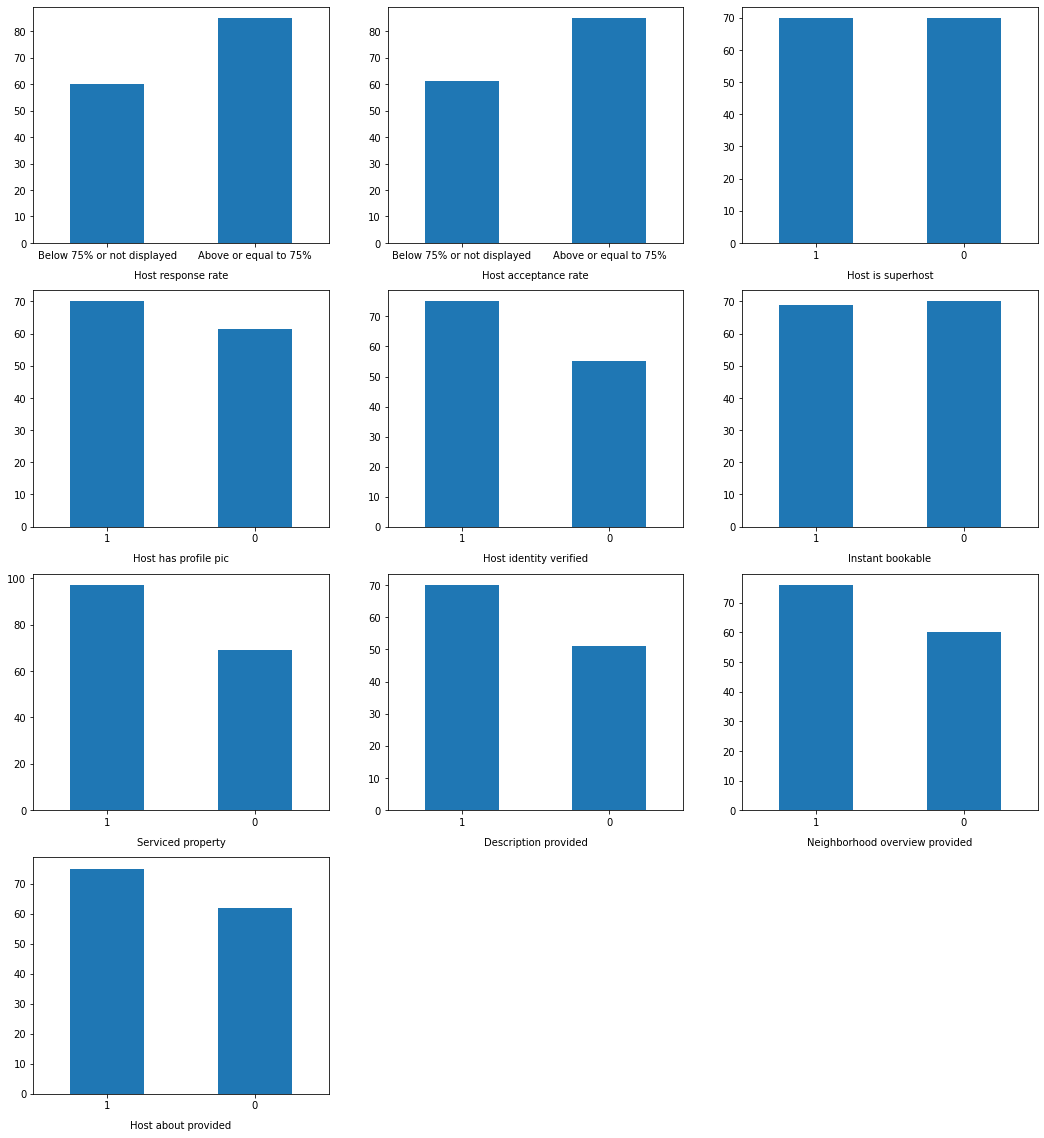

In [134]:
fig,ax = plt.subplots(4, 3, figsize=(18,20))

for ax_, column in zip(ax.flatten(), other_categorical_binary):
    
    x_label = column.replace('_', ' ').capitalize()
    
    df_vis.groupby(column).median()['price'].sort_index(ascending=False).plot.bar(ax=ax_,rot=0)
    ax_.set_xlabel(x_label, labelpad=10)

fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])
plt.show()

In [23]:
variables_continuous = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 
                        'distance_from_center', 'station_distance', 'mean_monthly_rent',
                        'name_length', 'description_length', 'neighborhood_overview_length', 'host_about_length']

In [24]:
quantitative_property = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

quantitative_location = ['distance_from_center', 'station_distance', 'mean_monthly_rent']

quantitative_listing = ['calculated_host_listings_count', 'name_length',
                       'description_length', 'neighborhood_overview_length', 'host_about_length']

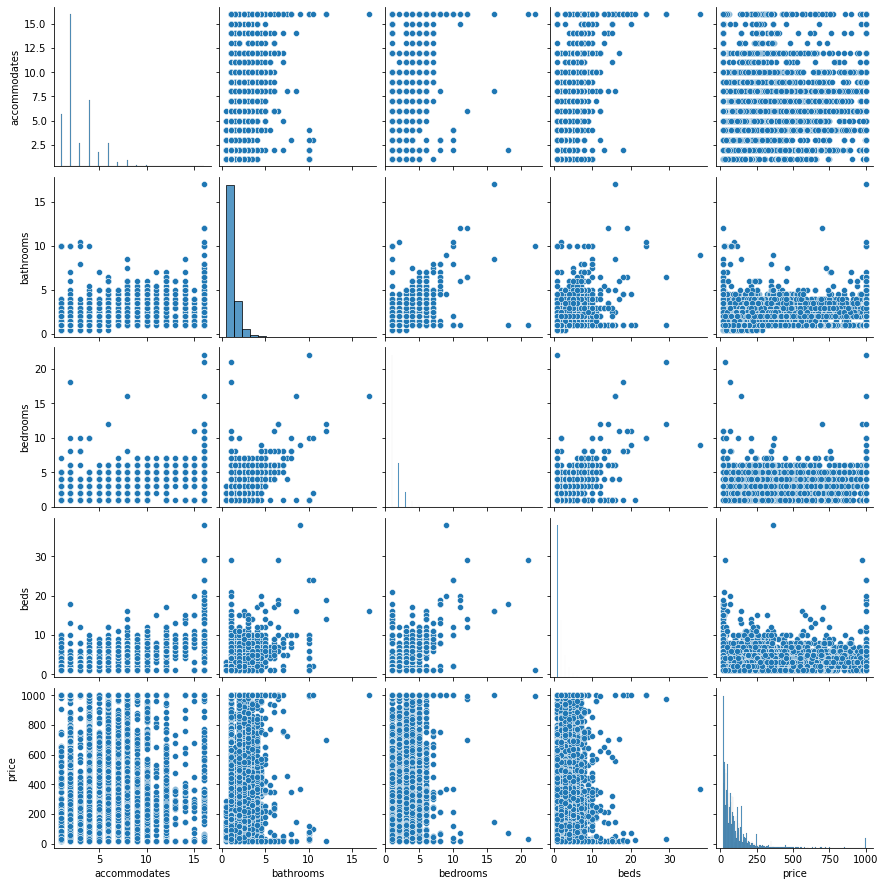

In [25]:
sns.pairplot(df_vis[quantitative_property +['price']])

plt.show()

Let's look at a few outliers that this pairplot has highlighted.....

- property with 15 bedrooms, but a low price

This property doesn't appear online when I enter the URL. Due to it being a massive outlier and potential incorrect price, I'm going to remove it from the dataset.

In [26]:
df_vis.drop(index=60337, inplace=True)
df.drop(index=60337, inplace=True)

A lot of outliers where the price of the property doesn't match how many guests/beds there are

In [27]:
df_vis.loc[((df_vis.room_type=='Shared room')|df_vis.name.str.contains('dorm',case=False))&(df_vis.accommodates>=5),['accommodates','bathrooms']] = 1
df.loc[((df.room_type=='Shared room')|df.name.str.contains('dorm',case=False))&(df.accommodates>=5),['accommodates','bathrooms']] = 1

In [28]:
# amending an incorrect listing with high values

df_vis.loc[71043,['bathrooms', 'bedrooms', 'beds']] = 1
df.loc[71043,['bathrooms', 'bedrooms', 'beds']] = 1

In [29]:
# resolving edge cases where some hostel properties had an incorrect number of bathrooms

df_vis.loc[(df_vis.room_type=='Hotel room')&(df_vis.name.str.contains('dorm|hostel|hotel',case=False))&(df_vis.bathrooms==10),'bathrooms'] = 1
df.loc[(df.room_type=='Hotel room')&(df.name.str.contains('dorm|hostel|hotel',case=False))&(df.bathrooms==10),'bathrooms'] = 1

In [30]:
# property accommodates and has more bedrooms than in reality. Reverting to median

df_vis.loc[70490,'accommodates'] = 2
df.loc[70490,'accommodates'] = 2
df_vis.loc[70490,'bedrooms'] = 1
df.loc[70490,'bedrooms'] = 1

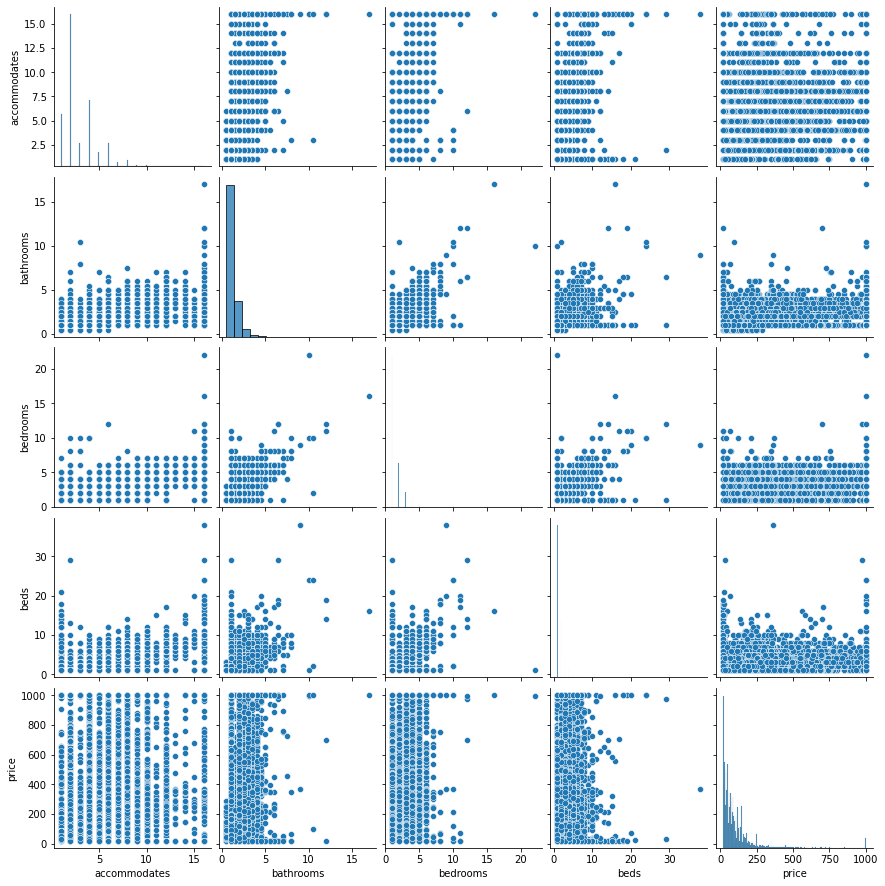

In [31]:
sns.pairplot(df_vis[quantitative_property +['price']])

plt.show()

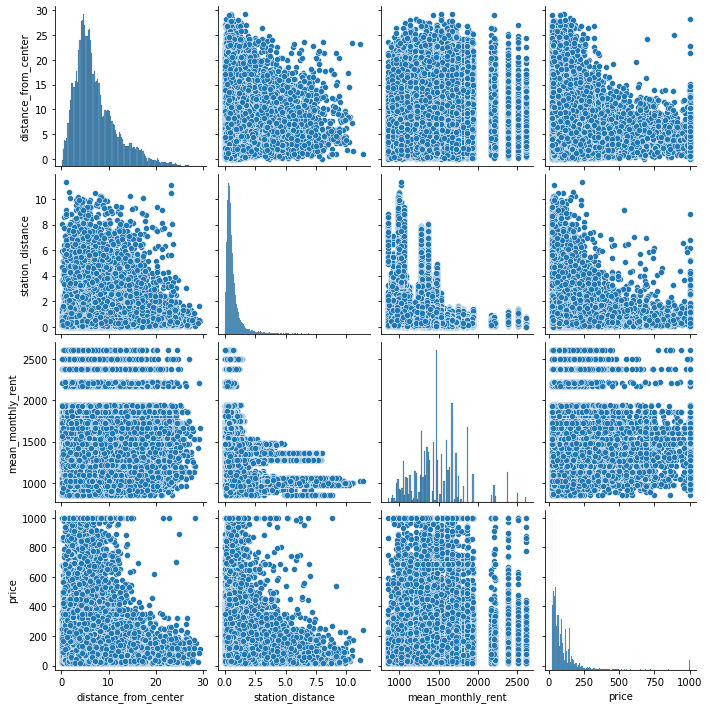

In [32]:
sns.pairplot(df_vis[quantitative_location +['price']])

plt.show()

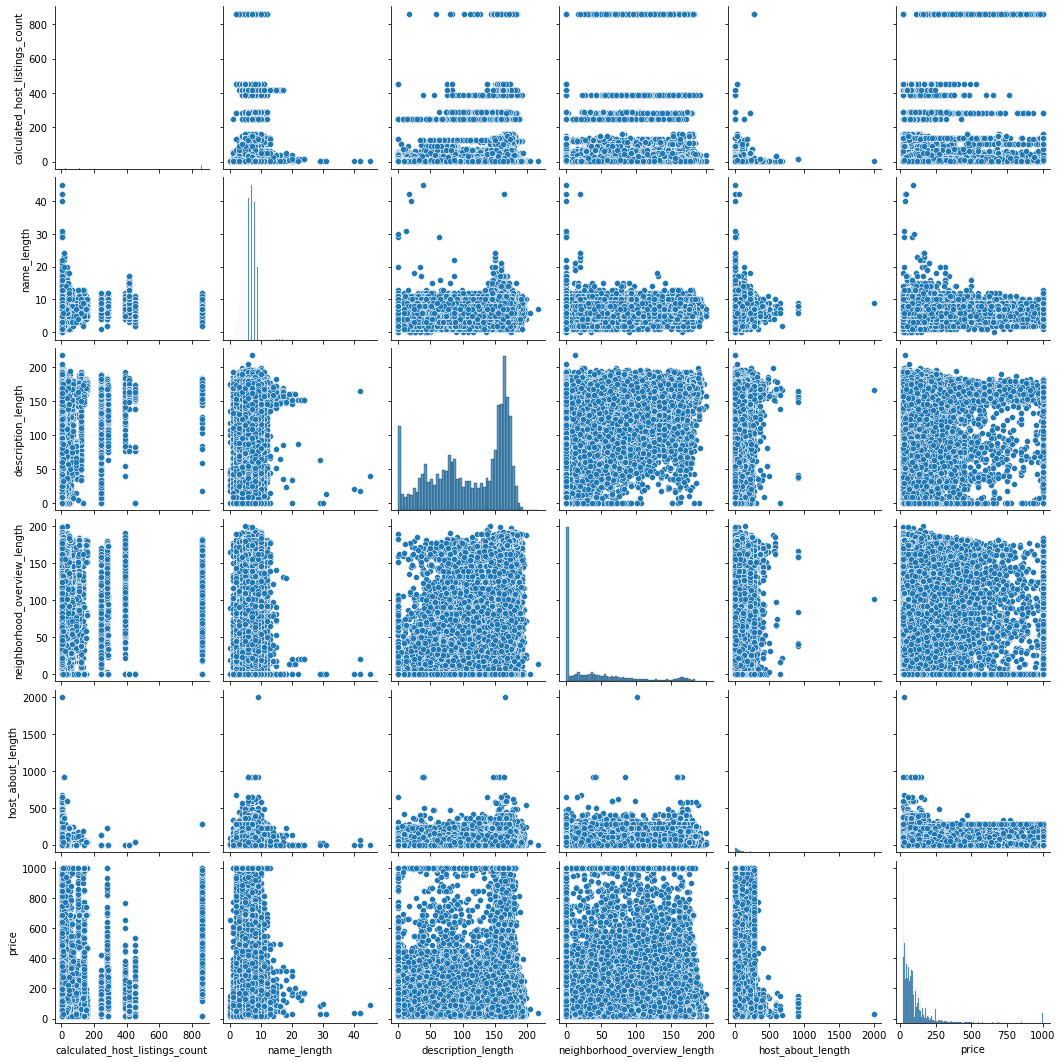

In [33]:
sns.pairplot(df_vis[quantitative_listing +['price']])

plt.show()

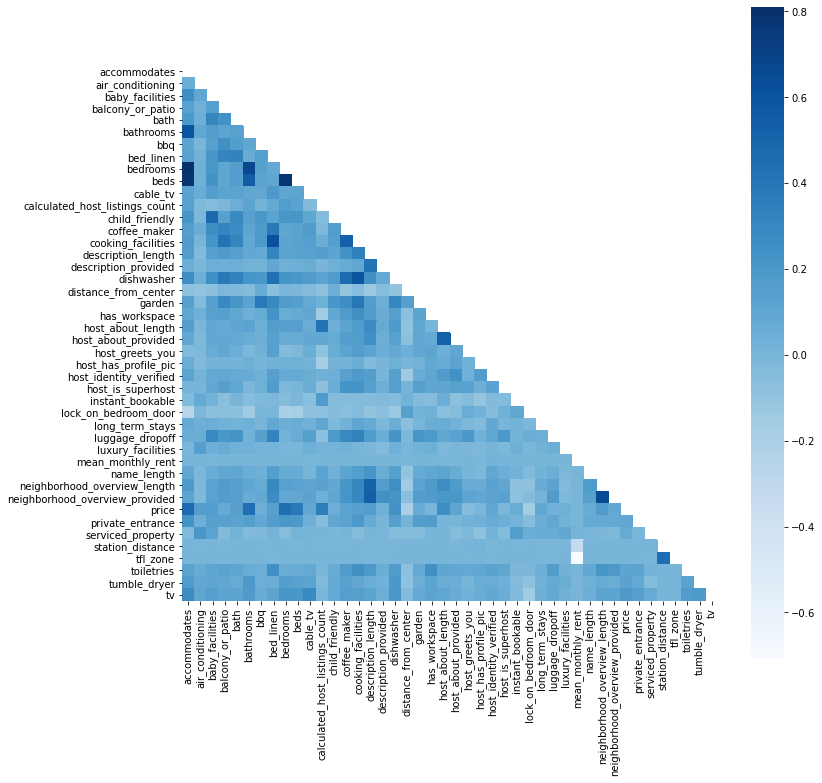

In [34]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))

sns.heatmap(df.reindex(sorted(df.columns), axis=1).corr(), mask=mask,square=True, cmap='Blues')

plt.show()

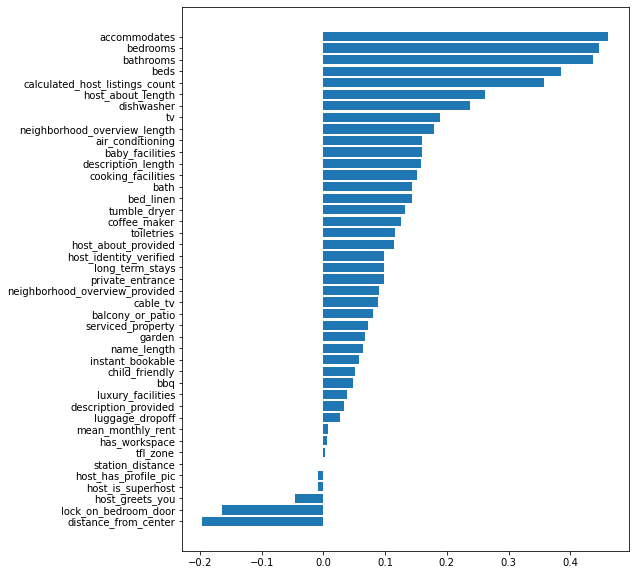

In [88]:
fig,ax = plt.subplots(figsize=(8,10))

correlation = df.corr()['price'].sort_values()
correlation.drop('price',inplace=True)

plt.barh(y=correlation.index, width=correlation)

plt.show()

In [52]:
categorical_columns = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
 'neighbourhood', 'room_type', 'property_type_basic', 'nearest_station', 'rail_network']

df_vis_dum = pd.get_dummies(df_vis, columns=categorical_columns)
dummified_columns = [column for column in df_vis_dum.columns 
                     if any(cat_column in column for cat_column in categorical_columns)]

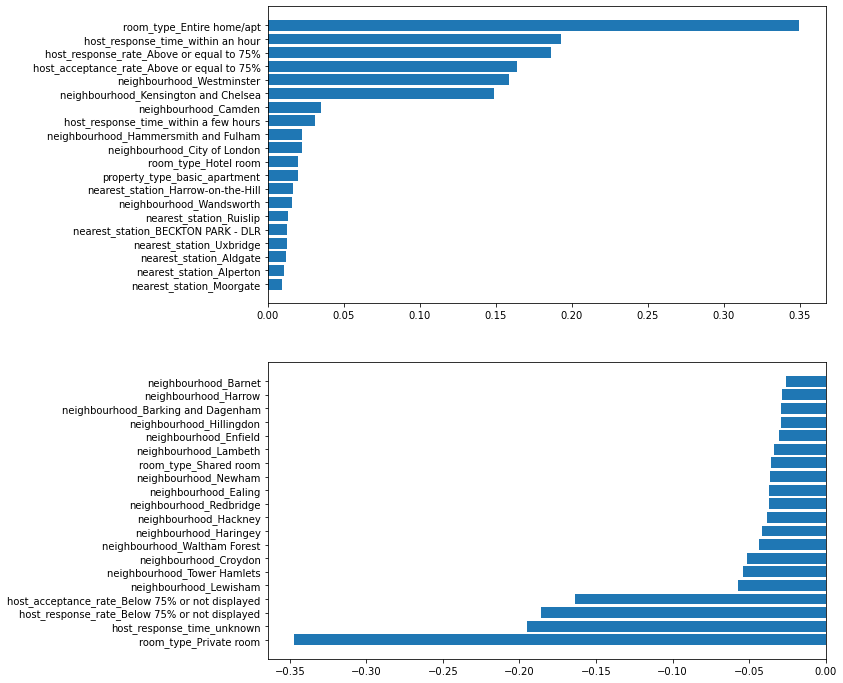

In [85]:
fig,ax = plt.subplots(2,1,figsize=(10,12))

dum_correlation = df_vis_dum[dummified_columns+['price']].corr()['price'].sort_values()
dum_correlation.drop('price',inplace=True)

ax[0].barh(y=dum_correlation[-20:].index, width=dum_correlation[-20:])
ax[1].barh(y=dum_correlation[:20].index, width=dum_correlation[:20])

plt.show()

Notes:

- drop the beds variable, this information is already given by accommodates (maybe not?)
- drop TFL Zone - we have strong negative with mean monthly rent
- drop neighbourhood_overview_provided - this info is already covered by the provided variable
- potentially also drop the 'bedrooms' variable (maybe not?)

In [ ]:
# dropping the beds variable

# df.drop('beds', axis=1, inplace=True)

# dropping TFL Zone

df.drop('tfl_zone', axis=1, inplace=True)

# dropping neighbourhood_overview_length

df.drop('neighborhood_overview_provided', axis=1, inplace=True)